# HK Travel: Forecasting with Google Trends

### Download Google Trends data from: www.google.com/trends
- Search term: Hong Kong
- US (Country), Jan 1, 2009 – Aug 31, 2014 (date), Travel (category), web search
- Download as csv (Need to login) and delete unnecessary first a few rows
- Change variable names to: date, search
- Save the data as “HK search.csv”

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

 # scikit-learn is designed for prediction
 # statsmodels is better suited for explanatiion

### 1. Use "HK visit" data. Split “Date” in the search data into year and month.
- Python: str.split('-')
- (Optional) Excel: Data > Text to columns
- (Optional) Tableau
  * Data source > Split
  * Data > Export data to csv

In [13]:
# Read data. Both Search data and Vistor data are monthly

df1 = pd.read_csv('HK search.csv')

df1.head()

,Month,Search
0,2009-01,75
1,2009-02,89
2,2009-03,81
3,2009-04,81
4,2009-05,86


In [15]:
# Split date into year and moth

df1['year'] = pd.to_numeric(df1['Month'].str.split('-').str[0])  # str[0]: 1st string
df1['month']= pd.to_numeric(df1['Month'].str.split('-').str[1])  # str[1]: 2nd string
df1.head()

,Month,Search,year,month
0,2009-01,75,2009,1
1,2009-02,89,2009,2
2,2009-03,81,2009,3
3,2009-04,81,2009,4
4,2009-05,86,2009,5


### 2. Merge the search data with Hong Kong visitor data based on year and month.

- Python: pd.merge( )
- (Optional) Tableau
  * Open the csv you created
  * Double click the file name on the right-top panel
  * Double click or drag “HK visit” file
  * Select Inner join > Match Year and Month (two separate lines)
  * Export data to csv
- (Optional) Excel: VLOOKUP
  * Put the two sheets in one Excel file
  * On the sheet “HK search”, insert a new column as the first column (A) and name it “lookup”. Apply one of the following formulas on A2
    * =CONCATENATE([@year], [@month])
    * =CONCATENATE(B2, C2)
  * On the sheet "HK visit”, add a new column (D) and name it as “search”.
  * Apply one of the following formulas on D2
    * =VLOOKUP([@year]&[@month], search[#All], 4, 0)
    * =VLOOKUP(A2&B2, 'HK search'!A1:D69, 4, 0)
      + [@year]&[@month]: Will select year and month in the same sheet, “HK visit”
      * search[#All]: Will select the entire data from “HK search”
      * 4: Will select values on the 4th column at “HK search” to merge
      * 0: Specifies “exact match”

In [17]:
#  Read data

df2 = pd.read_csv('HK visit.csv')  # monthly data
df2.head()

,visit,year,month
0,76682,2009,1
1,67687,2009,2
2,98750,2009,3
3,98067,2009,4
4,82771,2009,5


In [18]:
# Merge the two datasets and sort by year and month. Save the sorted result.

df = pd.merge(df1, df2, on=['year', 'month'], how='inner')
df.sort_values(['year', 'month'], inplace=True)
df.head(10)

,Month,Search,year,month,visit
0,2009-01,75,2009,1,76682
1,2009-02,89,2009,2,67687
2,2009-03,81,2009,3,98750
3,2009-04,81,2009,4,98067
4,2009-05,86,2009,5,82771
5,2009-06,81,2009,6,87574
6,2009-07,83,2009,7,96512
7,2009-08,82,2009,8,84269
8,2009-09,87,2009,9,77021
9,2009-10,94,2009,10,105758


### 3. Create the following lagged variables.
- L1Visit, L12Visit, L1Search, L12Search (L1: Lagged by one month, L12: Lagged by 12 months)

In [32]:
# Create lagged variables

df['L1visit'] = df.visit.shift(1)
df['L12visit'] = df.visit.shift(12)
df['L1search'] = df.Search.shift(1)
df['L12search'] = df.Search.shift(12)
df.head(10)

/var/folders/bq/c5pz5y2s3s38pdlp7mppn78m0000gn/T/ipykernel_68971/3568951561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['L1visit'] = df.visit.shift(1)
/var/folders/bq/c5pz5y2s3s38pdlp7mppn78m0000gn/T/ipykernel_68971/3568951561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['L12visit'] = df.visit.shift(12)
/var/folders/bq/c5pz5y2s3s38pdlp7mppn78m0000gn/T/ipykernel_68971/3568951561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Month,Search,year,month,visit,L1visit,L12visit,L1search,L12search
12,2010-01,82,2010,1,92278,NaN,NaN,NaN,NaN
13,2010-02,85,2010,2,65200,92278.0,NaN,82.0,NaN
14,2010-03,93,2010,3,107765,65200.0,NaN,85.0,NaN
15,2010-04,87,2010,4,105080,107765.0,NaN,93.0,NaN
16,2010-05,89,2010,5,95129,105080.0,NaN,87.0,NaN
17,2010-06,84,2010,6,100162,95129.0,NaN,89.0,NaN
18,2010-07,83,2010,7,102944,100162.0,NaN,84.0,NaN
19,2010-08,90,2010,8,84439,102944.0,NaN,83.0,NaN
20,2010-09,83,2010,9,93062,84439.0,NaN,90.0,NaN
21,2010-10,85,2010,10,121965,93062.0,NaN,83.0,NaN


In [33]:
# Drop missig values

df = df.dropna() 
df.head()

,Month,Search,year,month,visit,L1visit,L12visit,L1search,L12search
24,2011-01,75,2011,1,94367,93313.0,92278.0,79.0,82.0
25,2011-02,81,2011,2,71466,94367.0,65200.0,75.0,85.0
26,2011-03,100,2011,3,113540,71466.0,107765.0,81.0,93.0
27,2011-04,78,2011,4,107845,113540.0,105080.0,100.0,87.0
28,2011-05,76,2011,5,99638,107845.0,95129.0,78.0,89.0


In [ ]:
# Check data dimension (the number of rows and columns)

df.______

### 4. Run the following regression models and report the results (Delete missing values before running regression).
- M1 (base model): Visit = β0 + β1 L1Visit + β2 L12Visit + e
- M2: Visit = β0 + β1 L1Visit + β2 L12Visit + β3 Search + e
- M3: Visit = β0 + β1 L1Visit + β2 L12Visit + β3 L1Search + e
- M4: Visit = β0 + β1 L1Visit + β2 L12Visit + β3 L1Search + β4 L12Search + e

In [34]:
# Define y and x

y = df.visit
x1 = df[['L1visit', 'L12visit']]
x2 = df[['L1visit', 'L12visit', 'Search']]
x3 = df[['L1visit', 'L12visit', 'L1search']]
x4 = df[['L1visit', 'L12visit', 'L12search']]

In [35]:
#  Fit regression and display coefficients

m1 = LinearRegression().fit(x1, y)
print('Coefficients', m1.coef_)

m2 = LinearRegression().fit(x2, y)
print('Coefficients', m2.coef_)

m3 = LinearRegression().fit(x3, y)
print('Coefficients', m3.coef_)

m4 = LinearRegression().fit(x4, y)
print('Coefficients', m4.coef_)

Coefficients [0.07066056 0.82448125]
Coefficients [8.42508287e-02 7.93080514e-01 3.46554547e+02]
Coefficients [-9.12811576e-03  7.83051099e-01  3.96914812e+02]
Coefficients [7.55394730e-02 7.82384263e-01 2.34788427e+02]


### 5. Compare Root MSE (RMSE) of the models. Which model fits the data best? How much does the better model improve RMSE (% improvement)?

In [36]:
# Predict the dependent variables

pred1 = m1.predict(x1)
pred2 = m2.predict(x2)
pred3 = m3.predict(x3)
pred4 = m4.predict(x4)

In [37]:
# Obtain RMSE

rmse1 = mean_squared_error(y, pred1)**0.5  # **0.5: square root
rmse2 = mean_squared_error(y, pred2)**0.5
rmse3 = mean_squared_error(y, pred3)**0.5
rmse4 = mean_squared_error(y, pred4)**0.5

print('rmse1 =', rmse1)
print('rmse2 =', rmse2)
print('rmse3 =', rmse3)
print('rmse4 =', rmse4)

rmse1 = 6341.169186591264
rmse2 = 5684.811690625805
rmse3 = 5548.035903037262
rmse4 = 5953.419670781036


In [38]:
# Calcualte % improvement of the best model over the base model

(rmse4-rmse1)/rmse1

-0.061147953066785395

# Optional

### 6. Graph actual vs. predicted visits (3 lines in one graph: actual, predictions from the base and best model).

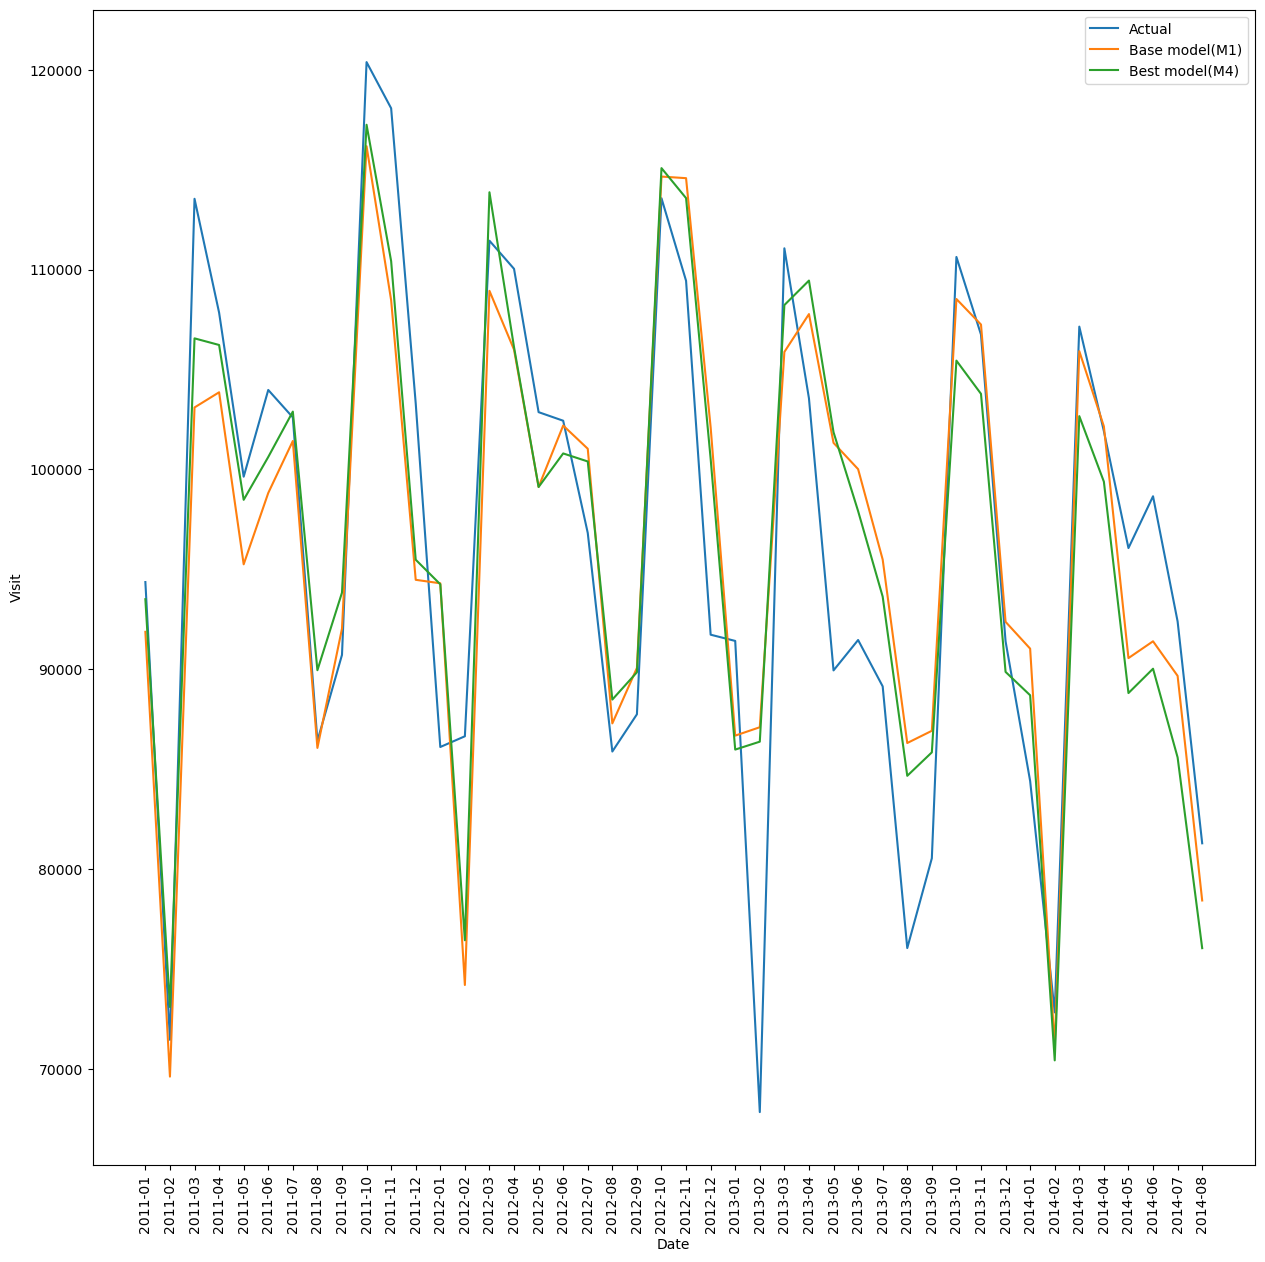

In [39]:
# Set figure size, define x and y lables.

plt.figure(figsize=(15,15))  # figure size
plt.xlabel('Date')
plt.ylabel('Visit')

plt.plot(df.Month, df.visit)  # x,y: actual visit
plt.plot(df.Month, pred1)  # predicted visit by M1
plt.plot(df.Month, pred4)  # predicted visit by M4
plt.legend(['Actual', 'Base model(M1)', 'Best model(M4)'])
plt.xticks(rotation=90)  # Rotate xticks by 90 degree
plt.show()